In [133]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from dateutil import parser

In [78]:
import numpy as np
import pandas as pd

In [79]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [80]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [81]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [82]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [83]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [84]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [85]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

In [135]:
max_date_in_data = session.query(func.max(Measurement.date)).scalar()
max_date = parser.parse(max_date_in_data)
max_date

datetime.datetime(2017, 8, 23, 0, 0)

In [149]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
current_time = datetime.utcnow()
climate1 = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > max_date - timedelta(weeks=52) ).\
    order_by(Measurement.date).\
    all()

df = pd.DataFrame(climate1, columns=['date', 'prcp'])
df = df.rename(columns = {'prcp':'precipitation'})
df.head(10)


,date,precipitation
0,2016-08-25,0.08
1,2016-08-25,0.08
2,2016-08-25,0.00
3,2016-08-25,0.00
4,2016-08-25,0.21
5,2016-08-25,0.06
6,2016-08-25,0.11
7,2016-08-26,0.00
8,2016-08-26,0.03
9,2016-08-26,0.02


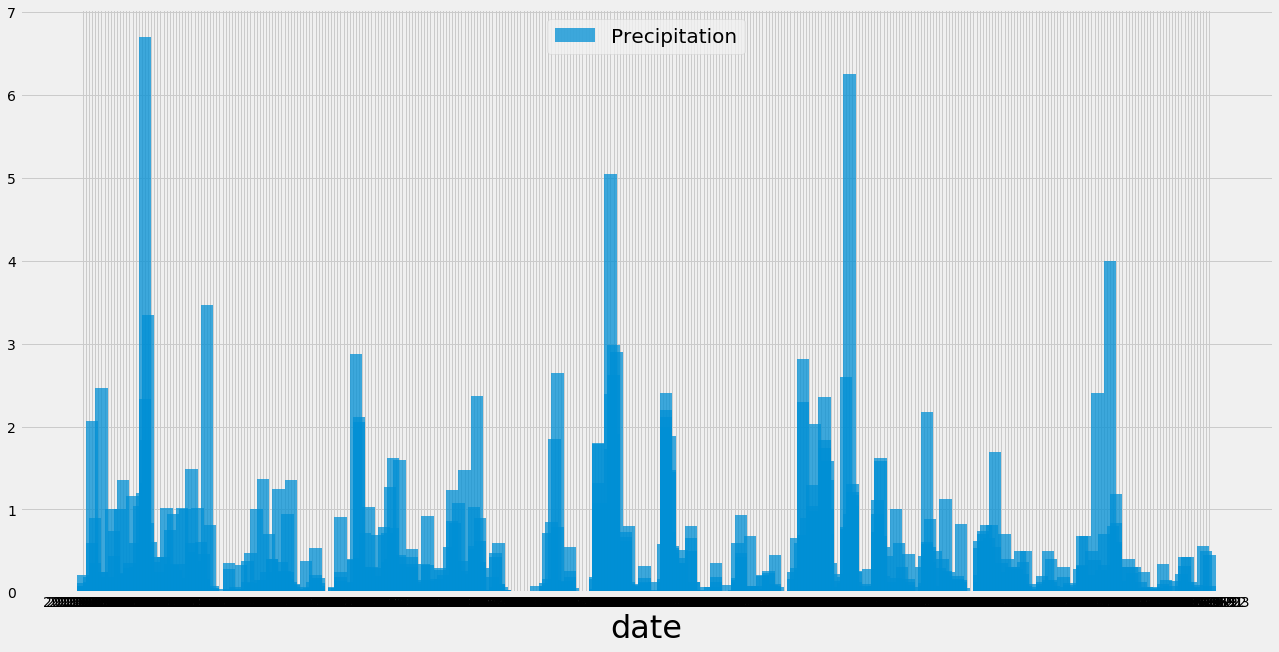

In [150]:
# Use Pandas Plotting with Matplotlib to plot the data
# ax = df.plot.bar(x='date', y='prcp', rot=0) 
# plt.bar

x = df['date']
y = df['precipitation']
fig = plt.figure(figsize=(20,10))
#ax1 = fig.add_subplot()
plt.bar(x, y, width = 4, alpha=0.75,)
plt.xlabel('date', fontsize = 32)
#ax.set_ylim((0, 7)) 
plt.legend(["Precipitation"],loc="upper center", fontsize = 20)
#plt.axis([0, 1, 2, 3, 4, 5, 6, 7])
#plt.yticks(size = 30)
#df.plot()
plt.show()


![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [151]:
df.describe()

,precipitation
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [ ]:
# Design a query to show how many stations are available in this dataset?


In [148]:
session.query(Station).count()

9

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [155]:
stations_count = session.query(Measurement.station, func.count(Measurement.station).\
         label('station_count')).\
         group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).\
        all()

stations_count                  

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [156]:
active_station = station_count[0][0]
active_station

'USC00519281'

In [157]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == active_station).all()


[(54.0, 85.0, 71.66378066378067)]

Text(0,0.5,'Frequency')

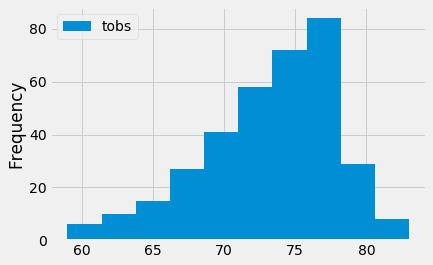

In [174]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > max_date - timedelta(weeks=52) ).\
    filter(Measurement.station == active_station).\
    order_by(Measurement.date).\
    all()

active_station_df = pd.DataFrame(active_station_data, columns=['date', 'tobs'])

station_plot = active_station_df.plot(y="tobs",kind="hist")
station_plot.set_ylabel("Frequency")

In [110]:
# Choose the station with the highest number of temperature observations.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Design a query to retrieve the last 12 months of temperature observation data (tobs).



# Filter by the station with the highest number of observations.

#Plot the results as a histogram with `bins=12`.



[(54.0, 85.0)]

![precipitation](Images/station-histogram.png)

In [175]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [176]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [179]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

temps = calc_temps('2011-02-28', '2011-03-05')
print(temps)

[(61.0, 69.75510204081633, 75.0)]


Text(0.5,1,'Trip Avg Temp')

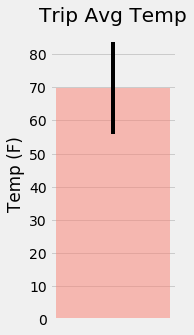

In [269]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
min_temp = temps[0][0]
avg_temp = temps[0][1]
max_temp = temps[0][2]

avgs = (avg_temp)
errs = (max_temp - min_temp)

ind = np.arange(1)  # the x locations for the groups
width = 20       # the width of the bars

fig, ax = plt.subplots(figsize=(2,5))
rects1 = ax.bar(ind, avgs, width, color='salmon', yerr=errs, alpha=0.5)
plt.xlabel("")
plt.ylabel("Temp (F)")
plt.ylabel("Temp (F)")
ax.set_xticks([])
plt.title("Trip Avg Temp")


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


,data1
letter,
a,0.816497
b,0.957427


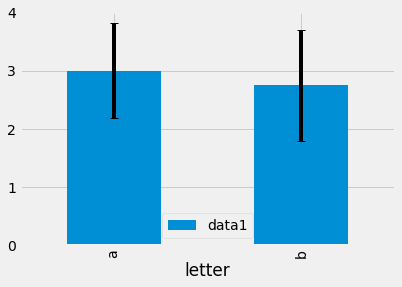

In [238]:
# Generate the data
ix3 = pd.MultiIndex.from_arrays([
    ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
    ],
    names=['letter'])

df3 = pd.DataFrame({'data1': [3, 2, 4, 3, 2, 4, 3, 2]}, index=ix3)
    

# Group by index labels and take the means and standard deviations
# for each group
gp3 = df3.groupby(level=('letter'))

gp3

means = gp3.mean()
means

errors = gp3.std()
errors

fig, ax = plt.subplots()

means.plot.bar(yerr=errors, ax=ax, capsize=4)
errors